#  Personal Browser History Analysis
## Questions to be answered:


### Libraries

#### Data Visualisation and Exploratory Data Analysis related

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.dates import MonthLocator,DateFormatter

#### File Handling Related

In [2]:
import json
import dill

#### Cleaning fields and extracting data related

In [3]:
from urllib.parse import urlsplit
import datetime
import calendar

### Functions

#### Function to categorize top visited urls

In [4]:
def categorize(url):
    
    if "facebook.com" in url:
        cat= "Social Media"
    elif "www.google.com" in url:
        cat="Search"
    elif "news" in url:
        cat= "News"
    elif "youtube.com" in url:
        cat= "Video"
    elif "gaana.com" in url:
        cat= "Music"    
    elif "mail" in url:
        cat= "Mail"
    elif "www.primevideo.com" in url or "www.netflix.com" in url:
        cat="Movie"
    elif "docs.google.com" in url:
        cat="Docs"
    elif "http://127.0.0.1:8000" in url:
        cat="Django Related"
    elif "github.com" in url:
        cat="Github"
    elif "newtab" in url:
        cat= "New Tab"
    else: 
        cat= "Not Available"
    return cat


#### Function to get entries of a particular date 

In [5]:
def hbd(df,date):
    return df[df['Date']==date]

#### Function to slice data set between dates

In [6]:
def slice_df(daterange):
    # date1 and date2 should be in string format
    global sliced_df
    sliced_df=df[df["Date"]>daterange[0].date()][df["Date"]<daterange[1].date()]
    

### Loading the file

In [7]:
with open("BrowserHistory.json","r") as rf:
    data=json.load(rf)


###### Checking type of each json object

In [8]:
data['Browser History'][0]

{'favicon_url': 'https://www.google.com/favicon.ico',
 'page_transition': 'LINK',
 'title': 'Download your data',
 'url': 'https://takeout.google.com/',
 'client_id': 'MqSyxSNc+SaaXppZOfzDTw==',
 'time_usec': 1565030273283152}

### Initializing DataFrame

In [9]:
df = pd.DataFrame(data['Browser History'])

### Head of the dataframe

In [10]:
df.head()
gee=df[df["title"]=="New Tab"][df["page_transition"]=="TYPED"]
gee.head()

/media/adit/5d04464b-934c-455c-af4f-f0e6a43d237d/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,client_id,favicon_url,page_transition,time_usec,title,url
22,MqSyxSNc+SaaXppZOfzDTw==,NaN,TYPED,1565029737190767,New Tab,chrome://newtab/
32,MqSyxSNc+SaaXppZOfzDTw==,NaN,TYPED,1565029571309948,New Tab,chrome://newtab/
51,MqSyxSNc+SaaXppZOfzDTw==,NaN,TYPED,1565028916364565,New Tab,chrome://newtab/
67,MqSyxSNc+SaaXppZOfzDTw==,NaN,TYPED,1565028495727027,New Tab,chrome://newtab/
69,MqSyxSNc+SaaXppZOfzDTw==,NaN,TYPED,1565028492633673,New Tab,chrome://newtab/


#### Removing unnecessary column client_id, page_transition,favicon_url and title

In [11]:
df=df.drop(labels=["client_id","title","page_transition","favicon_url"],axis=1)
df.head()

,time_usec,url
0,1565030273283152,https://takeout.google.com/
1,1565030261734172,https://takeout.google.com/
2,1565030166722049,https://takeout.google.com/
3,1565030162465552,https://takeout.google.com/
4,1565030137158225,https://takeout.google.com/


### Creating new columns of date,weekday,hour of the day and  exact date stamp

In [12]:

df['Date']=df['time_usec'].apply(lambda x: datetime.datetime.fromtimestamp(x/1000000).date())
df['Date_Time']=df['time_usec'].apply(lambda x: datetime.datetime.fromtimestamp(x/1000000))
df['Weekday']=df['Date_Time'].apply(lambda x: x.strftime("%A"))
df['Hour']=df['Date_Time'].apply(lambda x: x.strftime("%H"))

### Calculating time delta (this will only provide a very rough estimate on how much time was spent )

In [13]:
df["td"]=df["time_usec"].diff(periods=-1)/1000000/60
df.head()

,time_usec,url,Date,Date_Time,Weekday,Hour,td
0,1565030273283152,https://takeout.google.com/,2019-08-06,2019-08-06 00:07:53.283152,Tuesday,00,0.192483
1,1565030261734172,https://takeout.google.com/,2019-08-06,2019-08-06 00:07:41.734172,Tuesday,00,1.583535
2,1565030166722049,https://takeout.google.com/,2019-08-06,2019-08-06 00:06:06.722049,Tuesday,00,0.070942
3,1565030162465552,https://takeout.google.com/,2019-08-06,2019-08-06 00:06:02.465552,Tuesday,00,0.421789
4,1565030137158225,https://takeout.google.com/,2019-08-06,2019-08-06 00:05:37.158225,Tuesday,00,0.181720


#### Deleting time_usec

In [14]:
df=df.drop('time_usec',axis=1)

### Creating new columns for categories  and base_url

In [15]:
df["Base_Url"]=df["url"].apply(lambda x: urlsplit(x).netloc)
df['category']=df['url'].apply(categorize)


#### Dropping url

In [16]:
df= df.drop("url",axis=1)


### Filling Missing Dates

In [17]:
unique_dates=df["Date"].unique()
r = pd.date_range(start=df["Date"].min(), end=df["Date"].max())
for date in r:
    if date.date() not in unique_dates:
        df=df.append({'Date':date.date(),'category':'Not Available','Hour':'-1','Base_Url':'0','Date_Time':date,'td':0,'Weekday':date.strftime("%A")},ignore_index=True)
# Hour is set to -1 of this data set to indicate an empty date

# Data Analysis 
<br>
Finally(😛 )
<br>
We will be exploring the data in the following aspects:
<ul>
    <li> Pareto Principle (80/20 rule ?) </li>
    <li> Category Based and Overall Count Usage :
        <ul>
            <li> Overall Category Distribution</li>
            <li> Month Wise  </li>
            <li> Hour Wise </li> 
            <li> Time Delta </li>
            <li> Over the year patterns with distinct markers at intervals of 2 months
        </ul>
    </li>
</ul>   
<br> 
We'll be using the Not Available websites only for overall count plots over time


## The Cleaned dataset


In [18]:

df_wna=df[df["category"]!="Not Available"]
df.head()

,Date,Date_Time,Weekday,Hour,td,Base_Url,category
0,2019-08-06,2019-08-06 00:07:53.283152,Tuesday,00,0.192483,takeout.google.com,Not Available
1,2019-08-06,2019-08-06 00:07:41.734172,Tuesday,00,1.583535,takeout.google.com,Not Available
2,2019-08-06,2019-08-06 00:06:06.722049,Tuesday,00,0.070942,takeout.google.com,Not Available
3,2019-08-06,2019-08-06 00:06:02.465552,Tuesday,00,0.421789,takeout.google.com,Not Available
4,2019-08-06,2019-08-06 00:05:37.158225,Tuesday,00,0.181720,takeout.google.com,Not Available


## Pareto Principle 
### 80% outcome comes from 20 % work
### In this case 80% website usage comes from 20% website
#### The same is valid for 90/10

In [19]:
distro={}

for i in range(0,3275,10):
    distro[str(i)]=df.groupby("Base_Url").count().sort_values(by="category",ascending=False).iloc[i:i+10,:].sum()[0]

distrodf = pd.DataFrame(distro, index=[0])
sns.set()
distrodf=distrodf.T


In [20]:
order_url= df.groupby("Base_Url").count().sort_values(by="category",ascending=False)
# Store the top ten urls for later use 
top_10=list(order_url.index[0:10])


### Qualative Analysis

<p> Clearly seen as most of the sites data comes from the most popular websites</p>

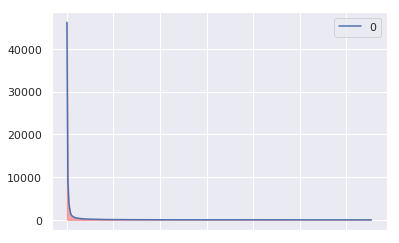

In [21]:
g=distrodf.plot(kind="line")
labels=g.set_xticklabels(rotation=90,labels=g.get_xticklabels())
l1 = g.lines[0]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

g.fill_between(x1,y1, color="red", alpha=0.3)


plt.show(block=False)

### Quantative analysis for 90/10 rule


In [22]:
ninetypercent=df.shape[0]*0.9
sum =0

for key,value in distro.items():
    if sum<ninetypercent:
        sum+=value
    else:
        print("Percentage",int(key)/3275*100)
        break
    


Percentage 9.465648854961833


## Date range picker

In [23]:
import ipywidgets as widgets
from IPython.display import display

start_date = datetime.datetime(2018, 10, 24)
end_date = datetime.datetime(2019, 8, 2)

dates = pd.date_range(start_date, end_date, freq='D')

options = [(date.strftime(' %d %b %Y '), date) for date in dates]
index = (0, len(options)-1)

selection_range_slider = widgets.SelectionRangeSlider(
    options=options,
    index=index,
    description='Dates',
    orientation='horizontal',
    layout={'width': '500px'}
)


widgets.interact(
slice_df,
daterange=selection_range_slider
)


interactive(children=(SelectionRangeSlider(description='Dates', index=(0, 282), layout=Layout(width='500px'), …

<function __main__.slice_df(daterange)>

In [37]:
df=sliced_df

### Category and Datetime Scatter Plot

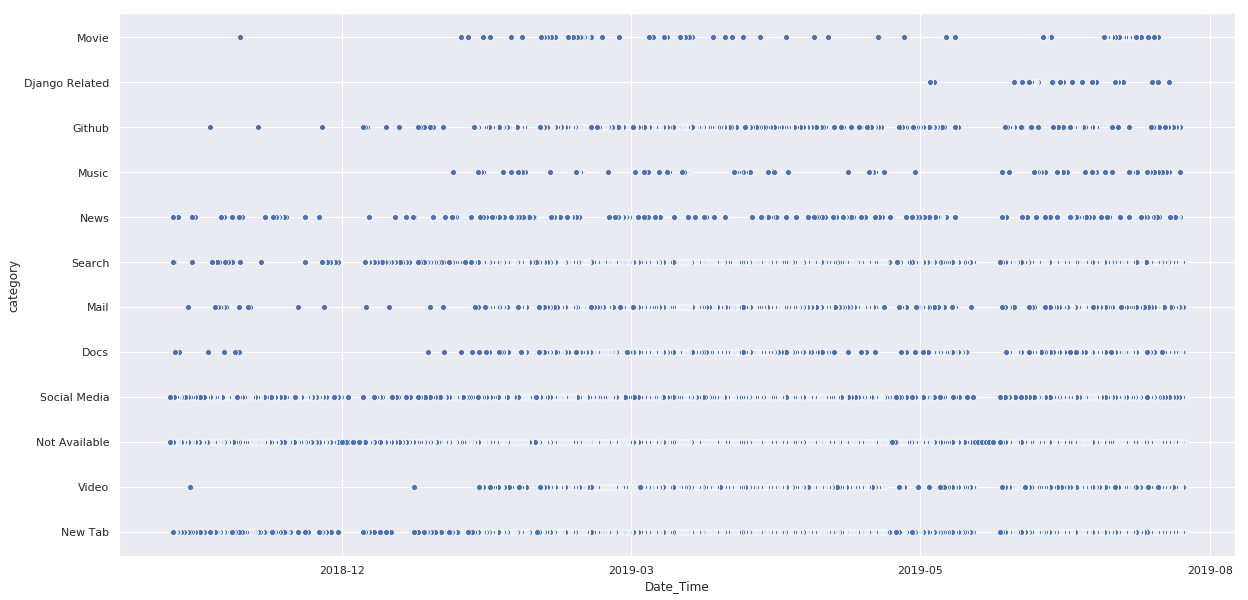

In [25]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

g=sns.scatterplot(df["Date_Time"],df["category"])

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

plt.show()


### Category based count barring new tab and not available categories

/media/adit/5d04464b-934c-455c-af4f-f0e6a43d237d/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


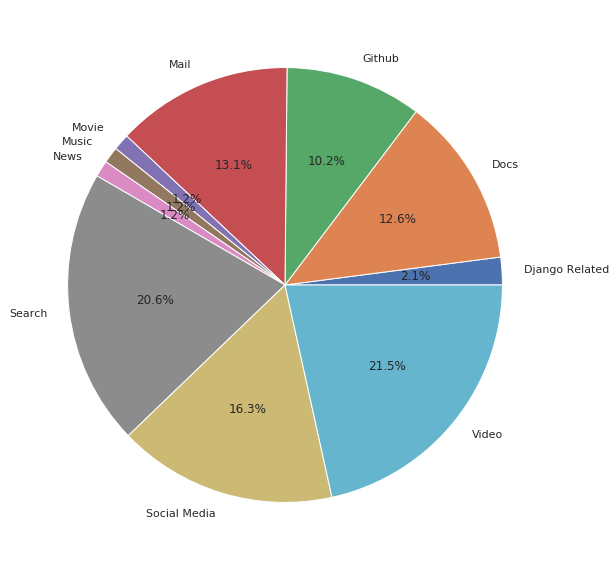

In [26]:
cat_df=df[df["category"]!="Not Available"][df["category"]!="New Tab"].groupby("category").count()
labels= cat_df.index.unique()
fig1, ax1 = plt.subplots(figsize=(20, 10))

cat_plot=ax1.pie(cat_df['Date'], labels=labels,autopct='%1.1f%%')

## Table form sorted for all categories

In [27]:
df.groupby("category").count().sort_values(by="Date",ascending=False)

,Date,Date_Time,Weekday,Hour,td,Base_Url
category,,,,,,
Not Available,31620,31620,31620,31620,31620,31620
Video,9122,9122,9122,9122,9122,9122
Search,8709,8709,8709,8709,8709,8709
Social Media,6897,6897,6897,6897,6897,6897
Mail,5564,5564,5564,5564,5564,5564
Docs,5355,5355,5355,5355,5355,5355
New Tab,4584,4584,4584,4584,4584,4584
Github,4302,4302,4302,4302,4302,4302
Django Related,871,871,871,871,871,871


### Over the year trend of count of webpages visited

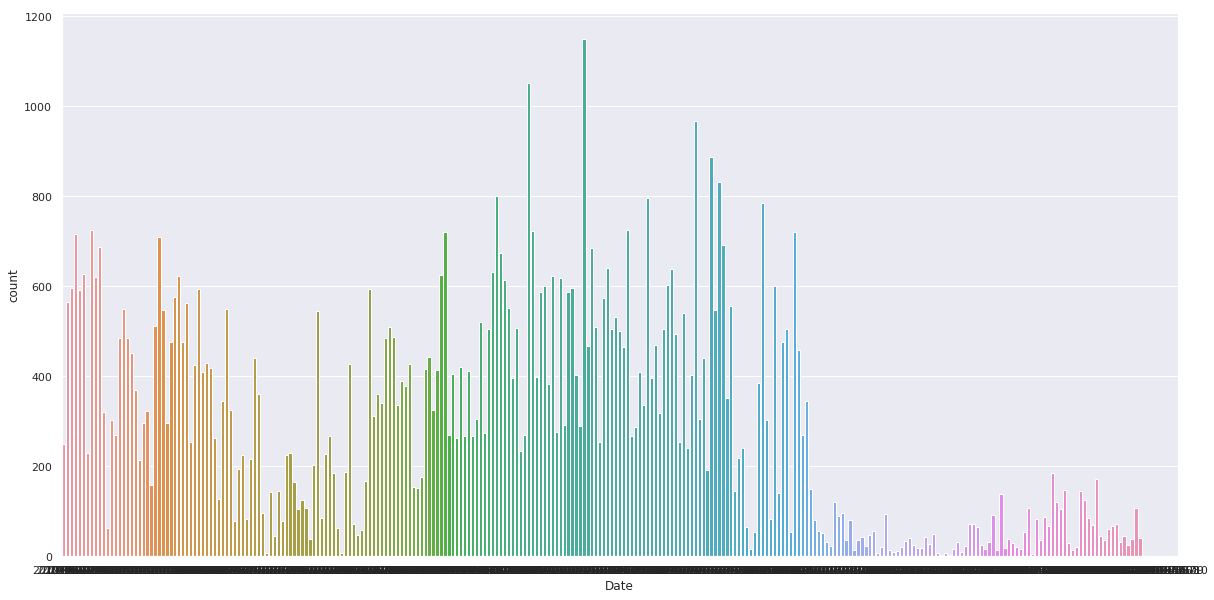

In [28]:

fig1, ax1 = plt.subplots(figsize=(20, 10))

sns.countplot("Date",data=df)

### Line plot of count vs date

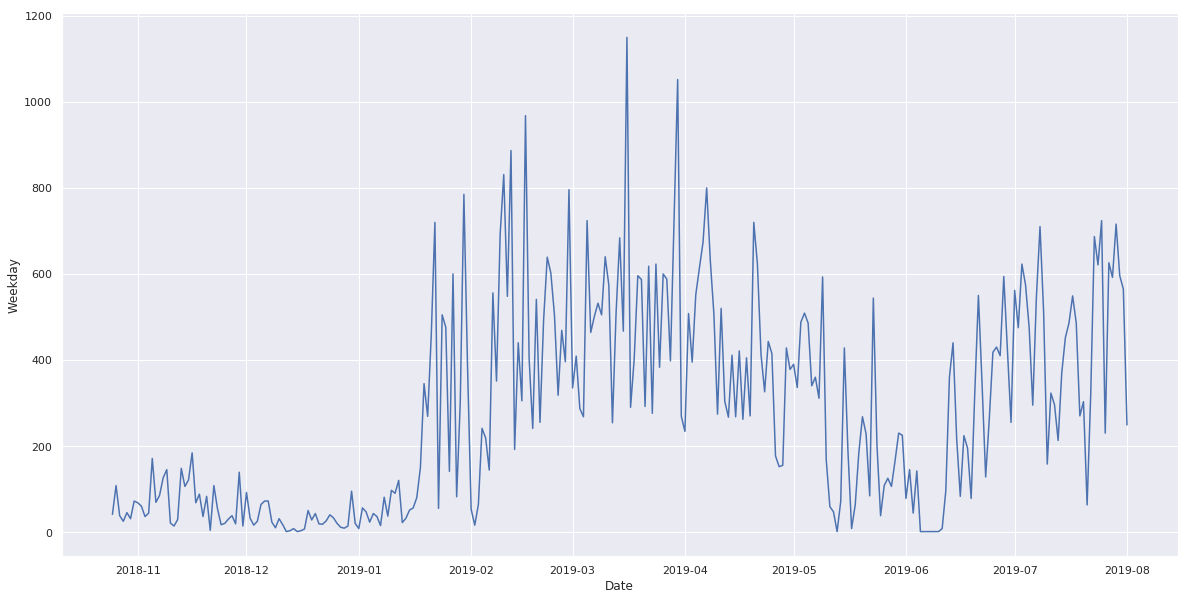

In [29]:


tf=df.groupby("Date").count()
tf.index.name="Date"
tf["Date"]=tf.index
tf.head()
fig1, ax1 = plt.subplots(figsize=(20, 10))

g=sns.lineplot(x="Date",y="Weekday",data=tf)


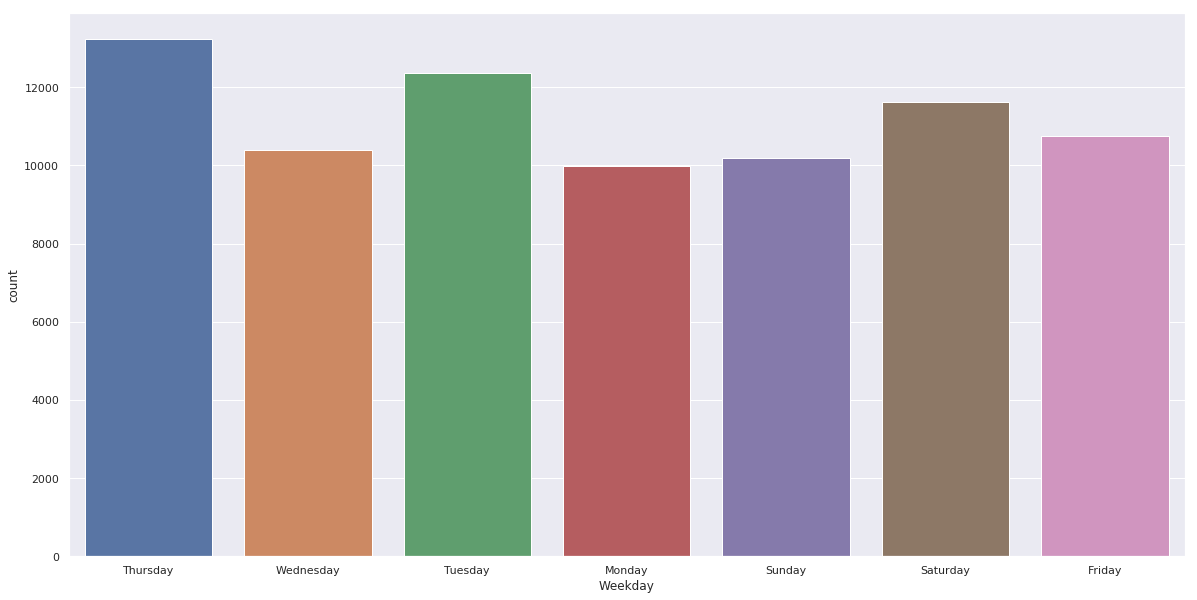

In [30]:
fig1, ax1 = plt.subplots(figsize=(20, 10))
g=sns.countplot(x="Weekday",data=df)

plt.show()
labels=g.set_xticklabels(rotation=90,labels=g.get_xticklabels())

#### Hourly Website Count


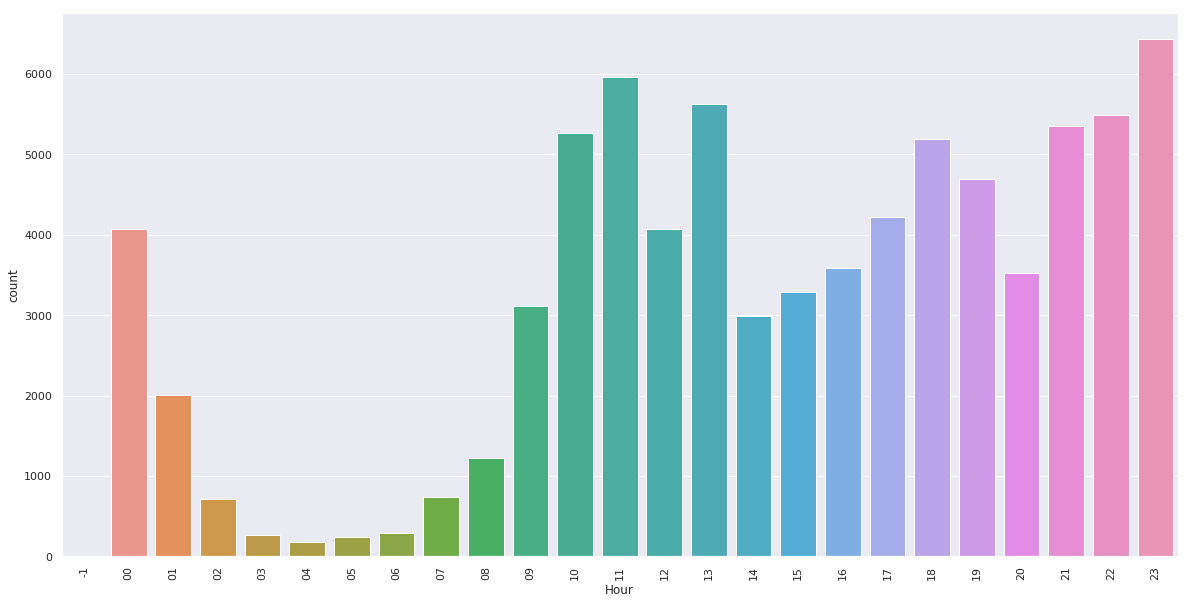

In [31]:
fig1, ax1 = plt.subplots(figsize=(20, 10))
g=sns.countplot(x="Hour",data=df)
labels=g.set_xticklabels(rotation=90,labels=g.get_xticklabels())

#### Category vs td(timedelta) Categorical Plot

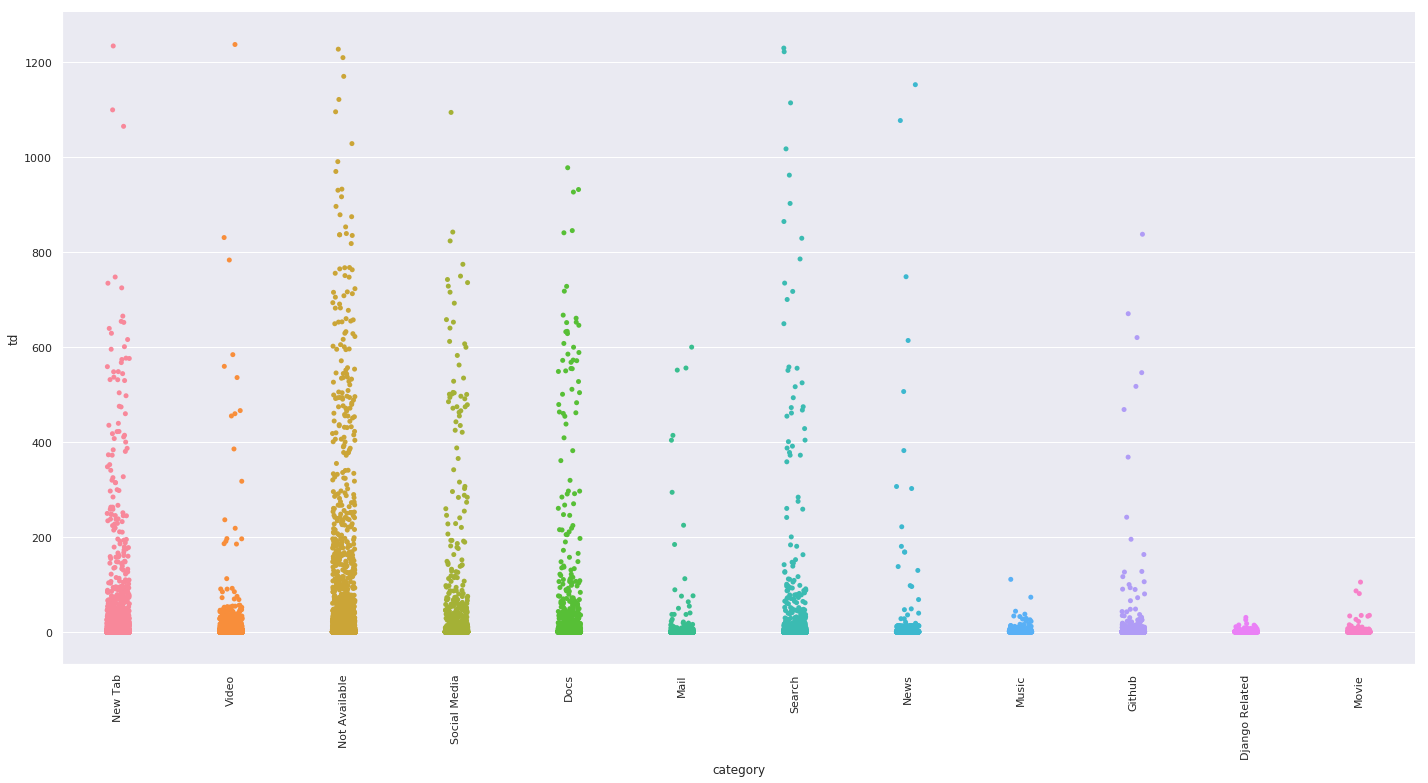

In [32]:
data_td_or=df[df["td"]<1250]
g=sns.catplot(x="category",y="td",kind="strip",data=data_td_or,aspect=2,height=10)
labels=g.set_xticklabels(rotation=90)

### Time Plot Count plot for each weekday

Thursday


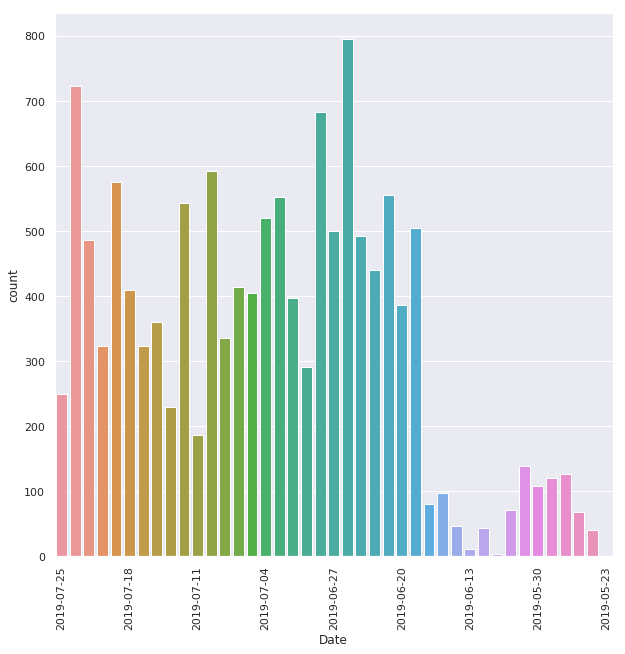

Wednesday


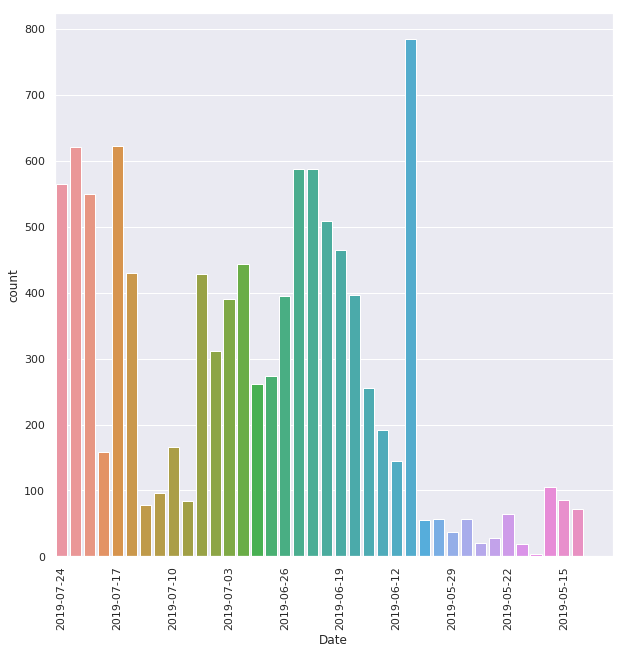

Tuesday


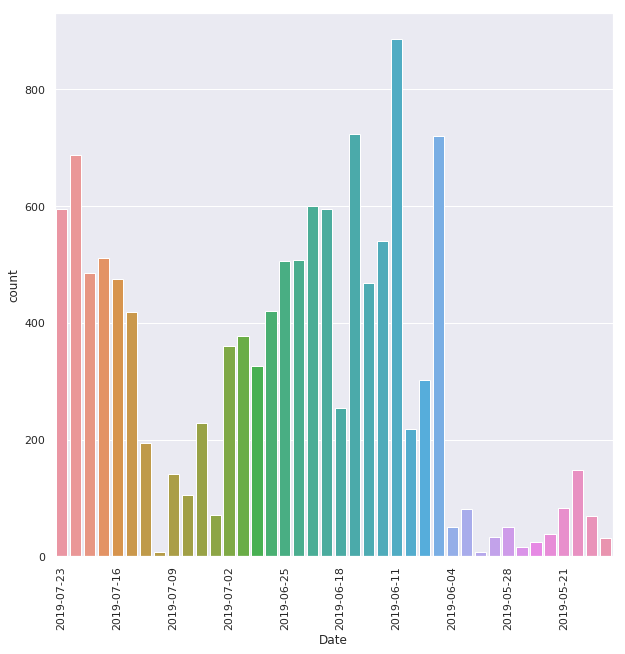

Monday


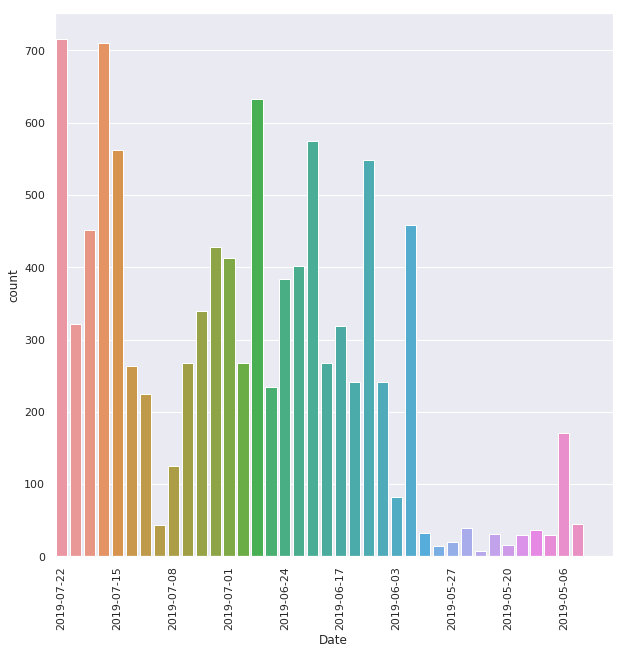

Sunday


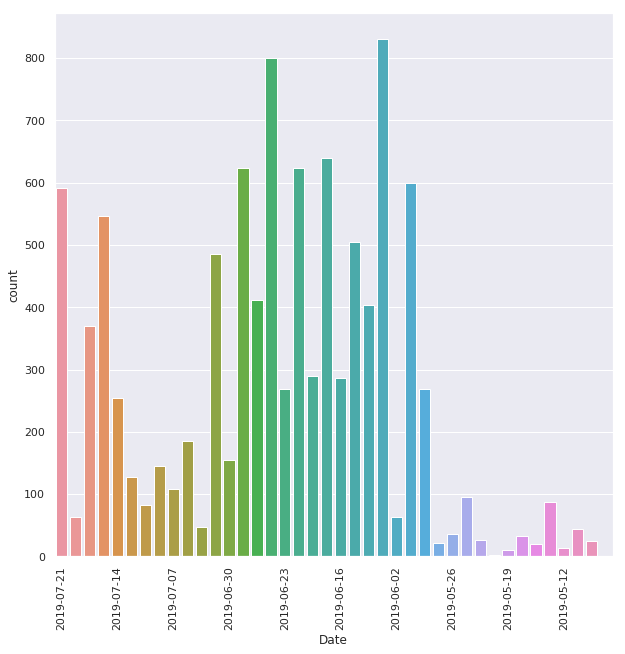

Saturday


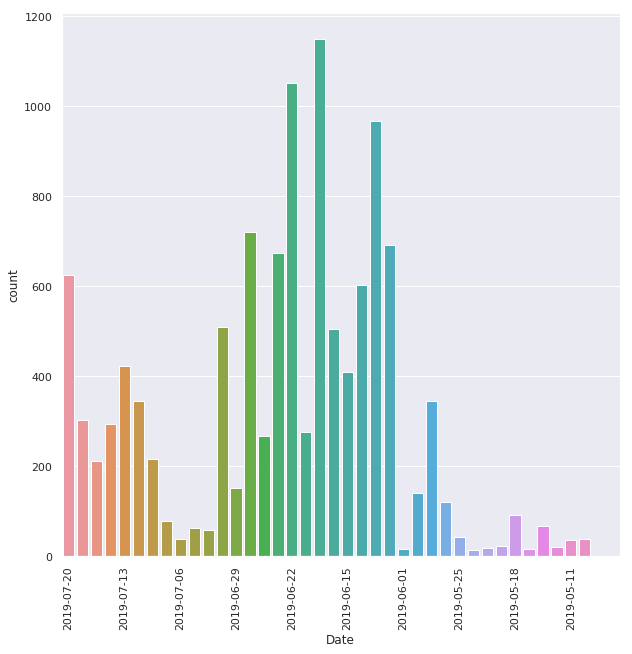

Friday


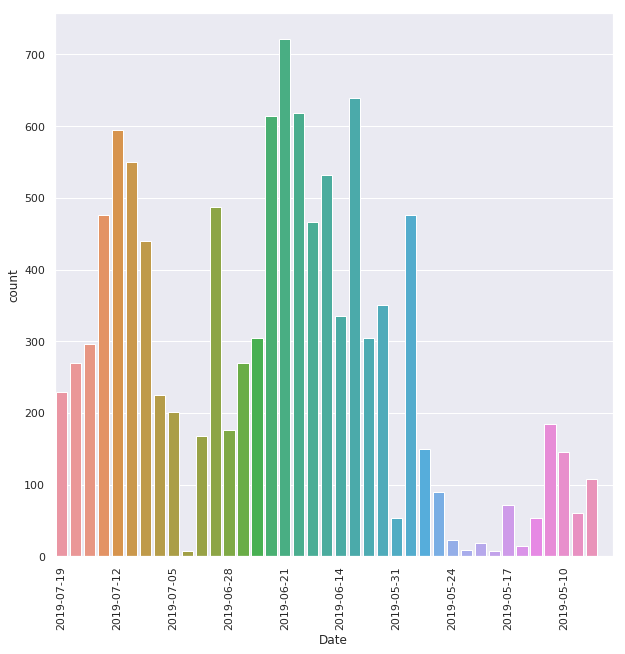

In [33]:
for day in df["Weekday"].unique():
    data= df[df["Weekday"]==day]
    print(day)
    fig1, ax1 = plt.subplots(figsize=(10, 10))

    g=sns.countplot("Date",data=data)
    labels=g.set_xticklabels(rotation=90,labels=g.get_xticklabels())
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))

    plt.show()

### Time Plot Count plot for each category

Social Media


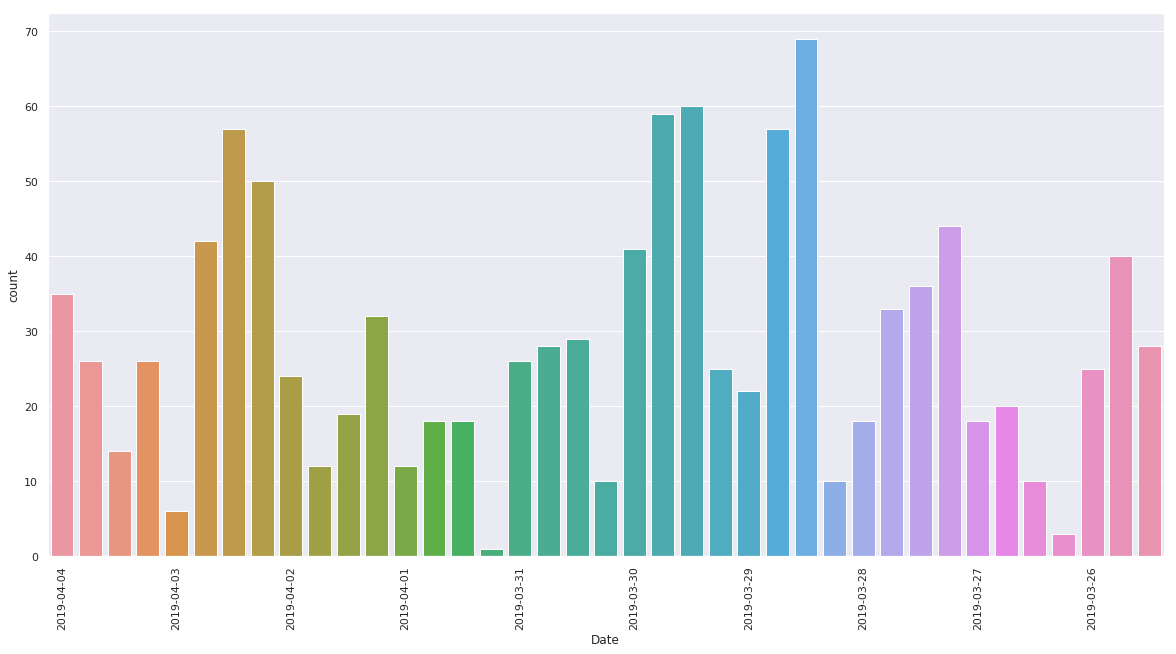

Docs


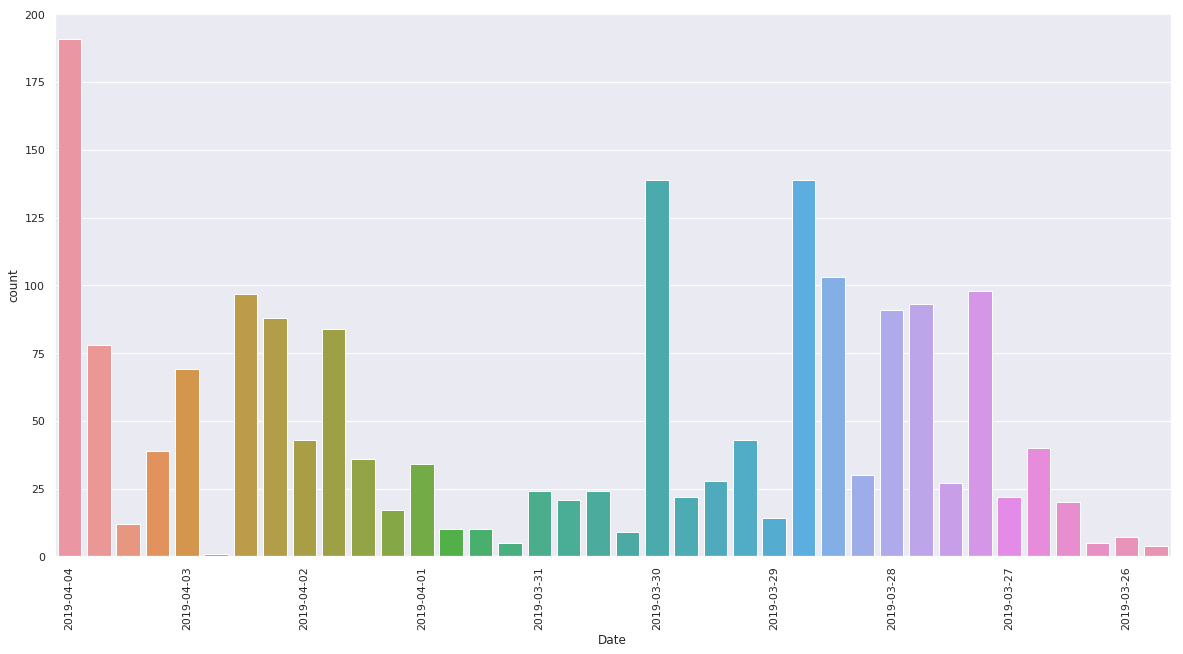

Search


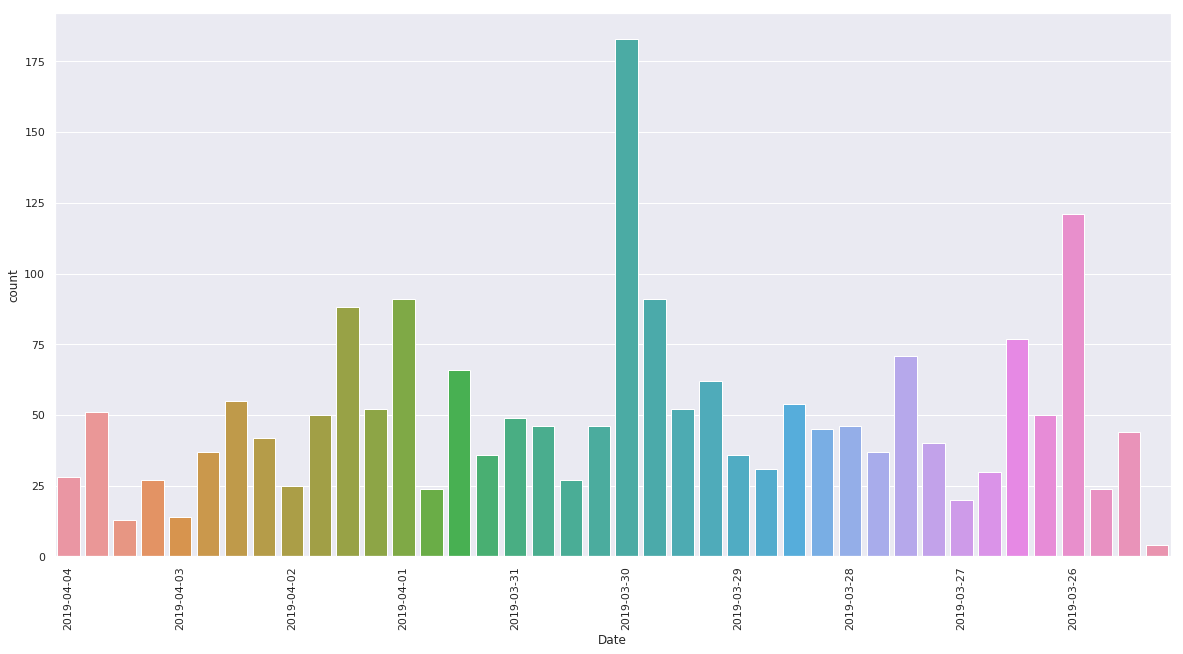

Mail


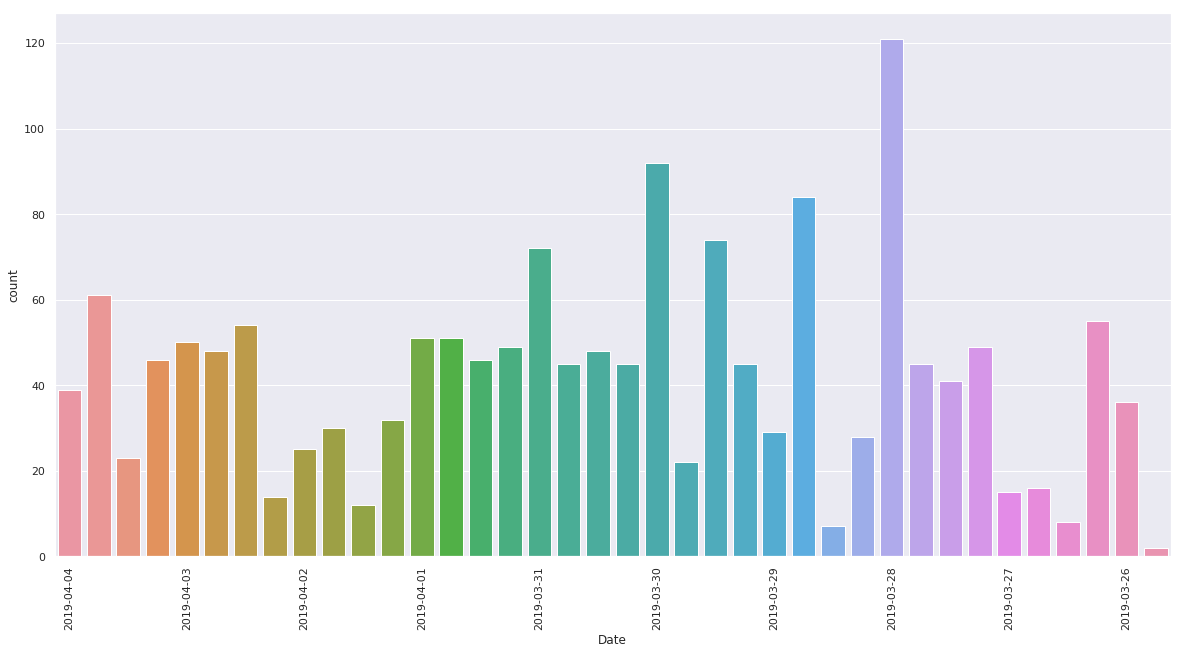

Video


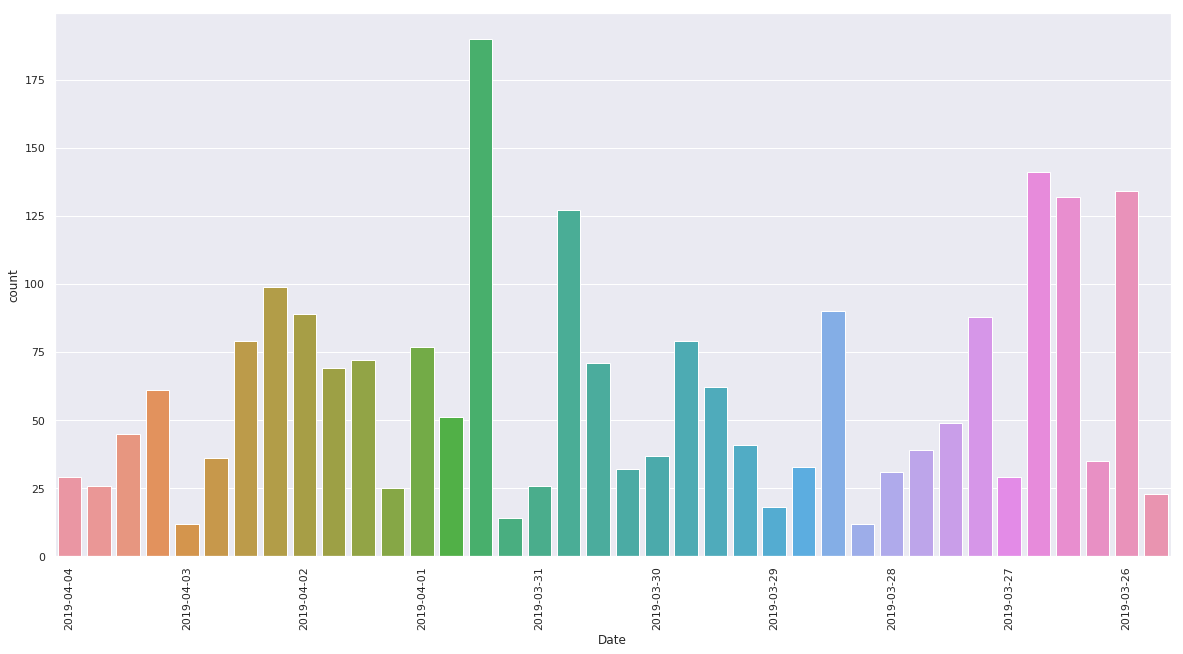

Github


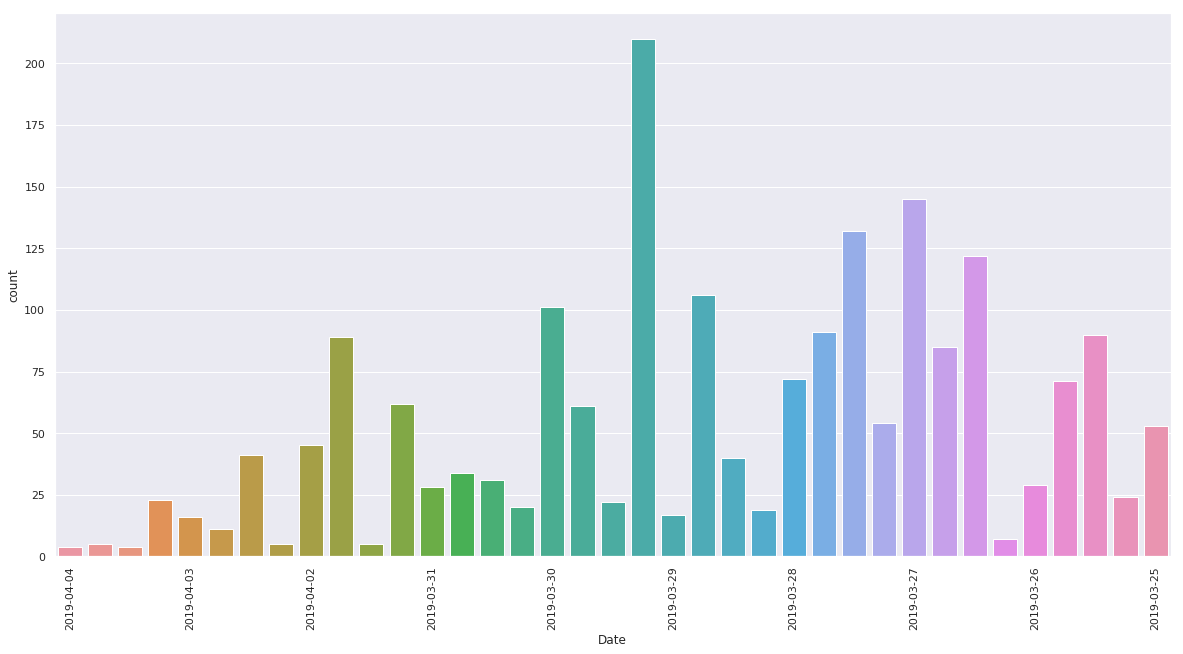

Music


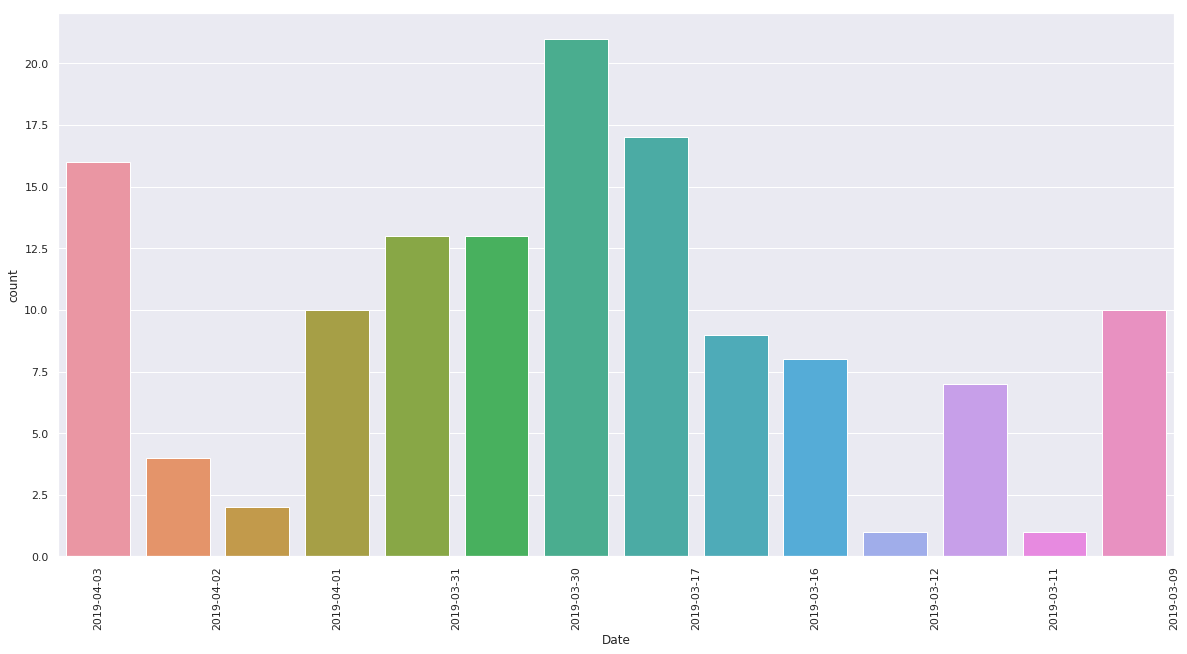

News


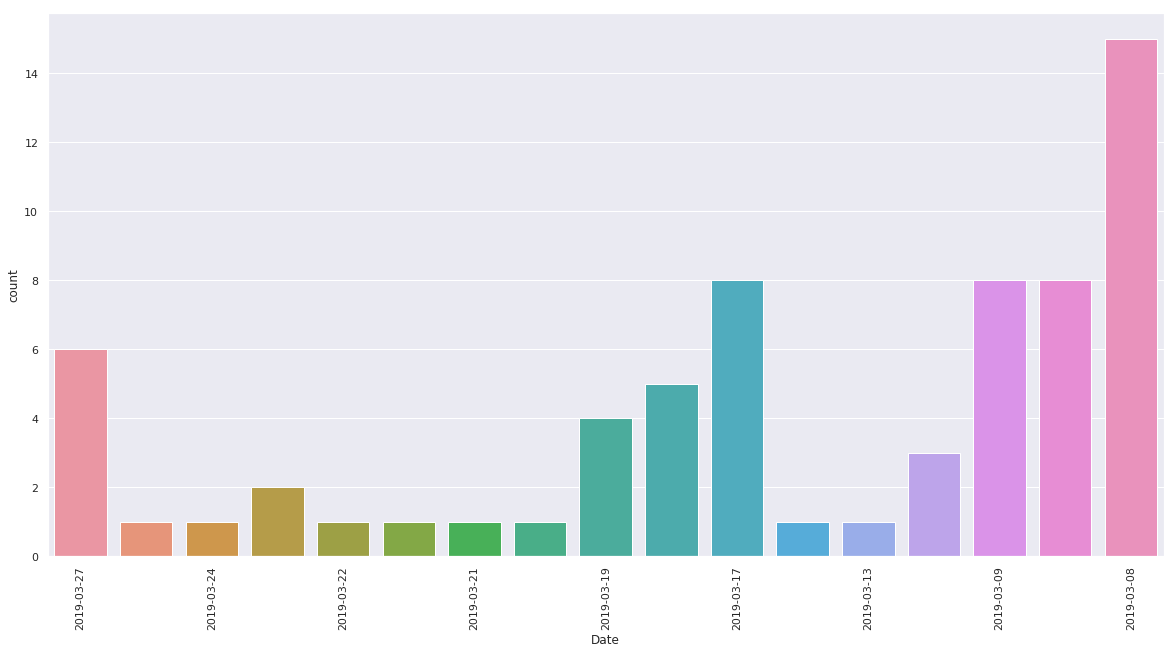

Movie


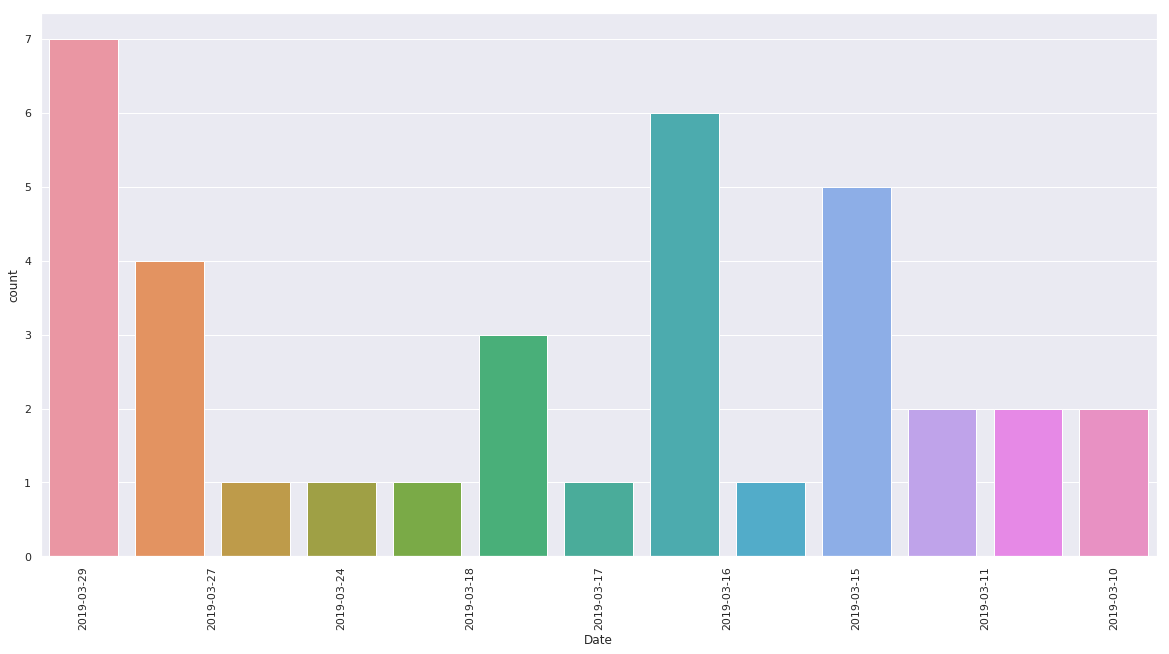

In [34]:
tf=df.iloc[-40000:-20000,:]
for cat in tf["category"].unique():
    if cat=="Not Available" or cat=="New Tab":
        continue
    data= tf[tf["category"]==cat]
    fig1, ax1 = plt.subplots(figsize=(20, 10))

    print(cat)
    g=sns.countplot("Date",data=data)
    labels=g.set_xticklabels(rotation=90,labels=g.get_xticklabels())
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))

    plt.show()



### Time Plot Count plot for each Base Url

www.youtube.com


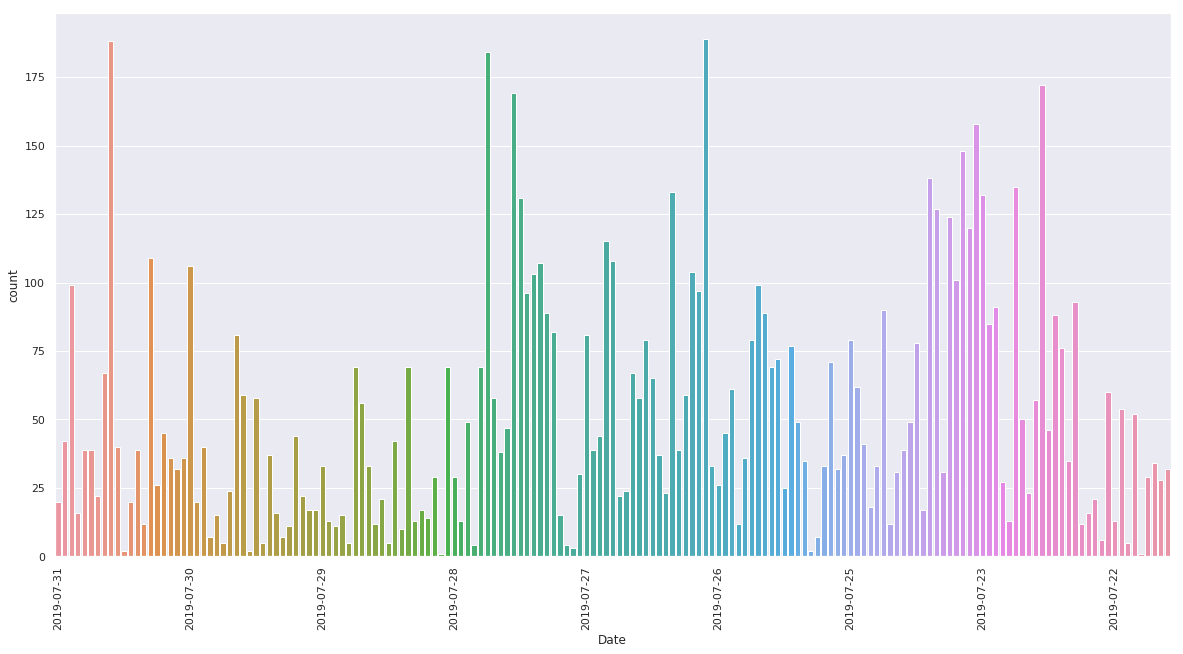

www.google.com


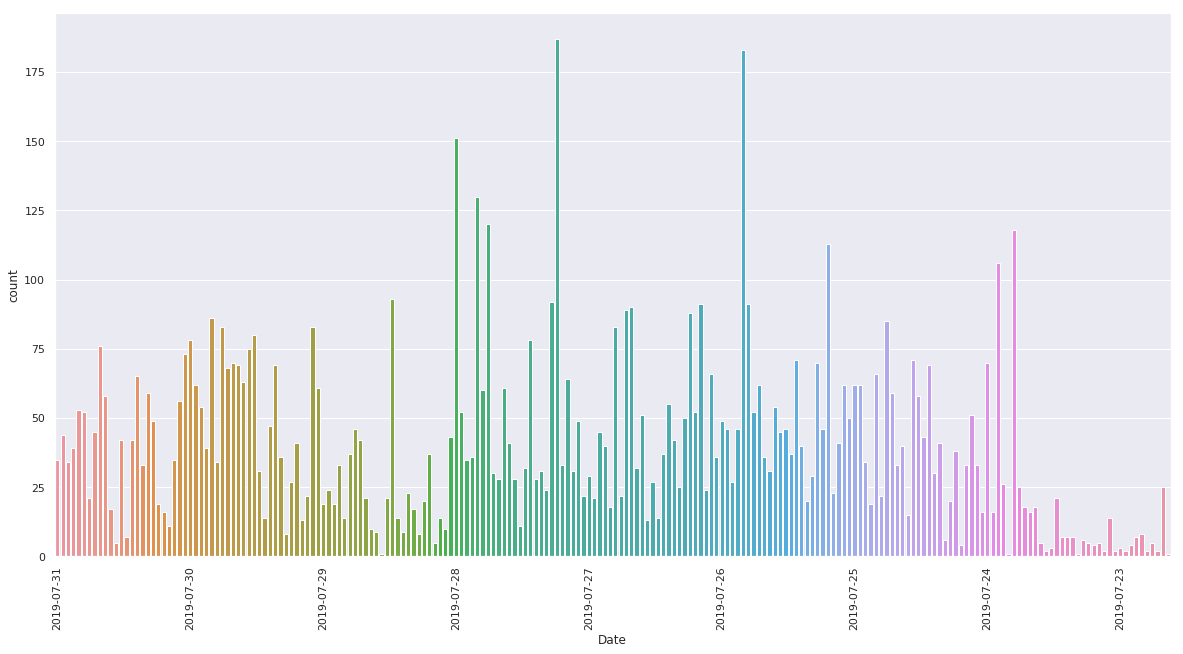

docs.google.com


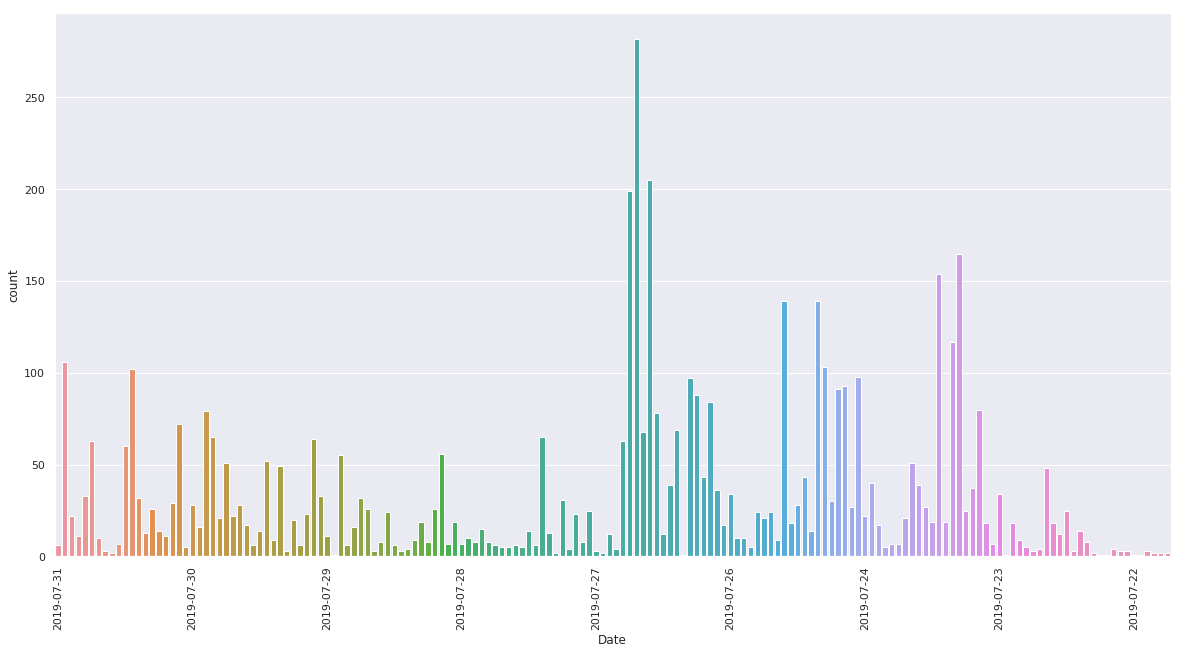

www.facebook.com


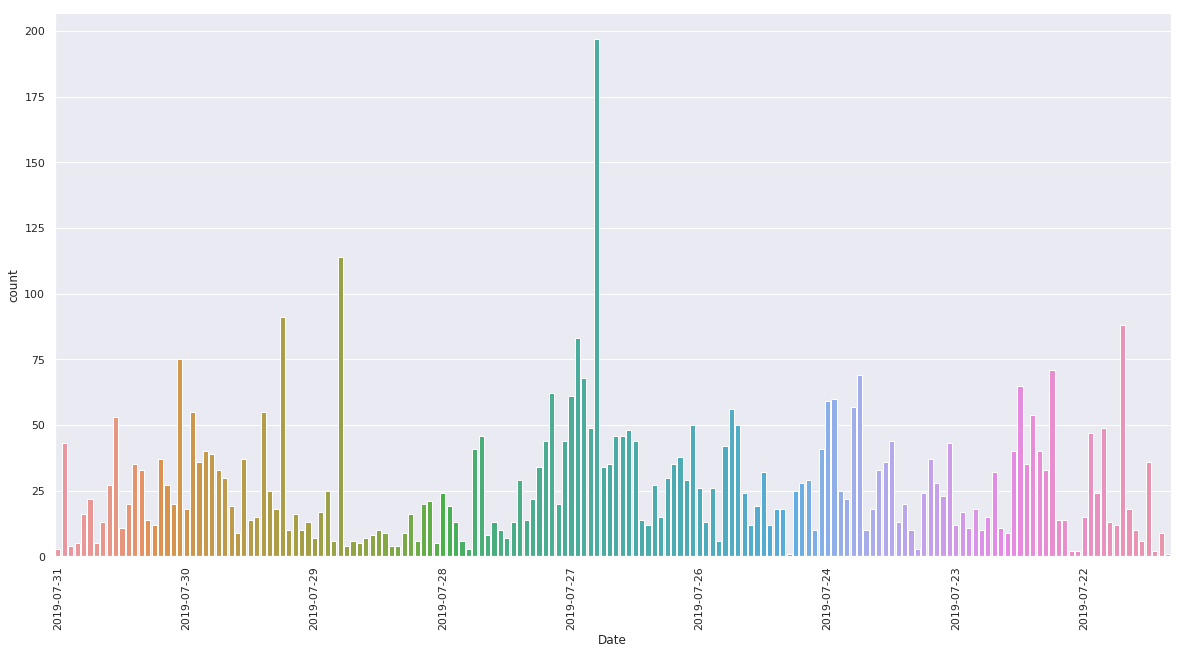

newtab


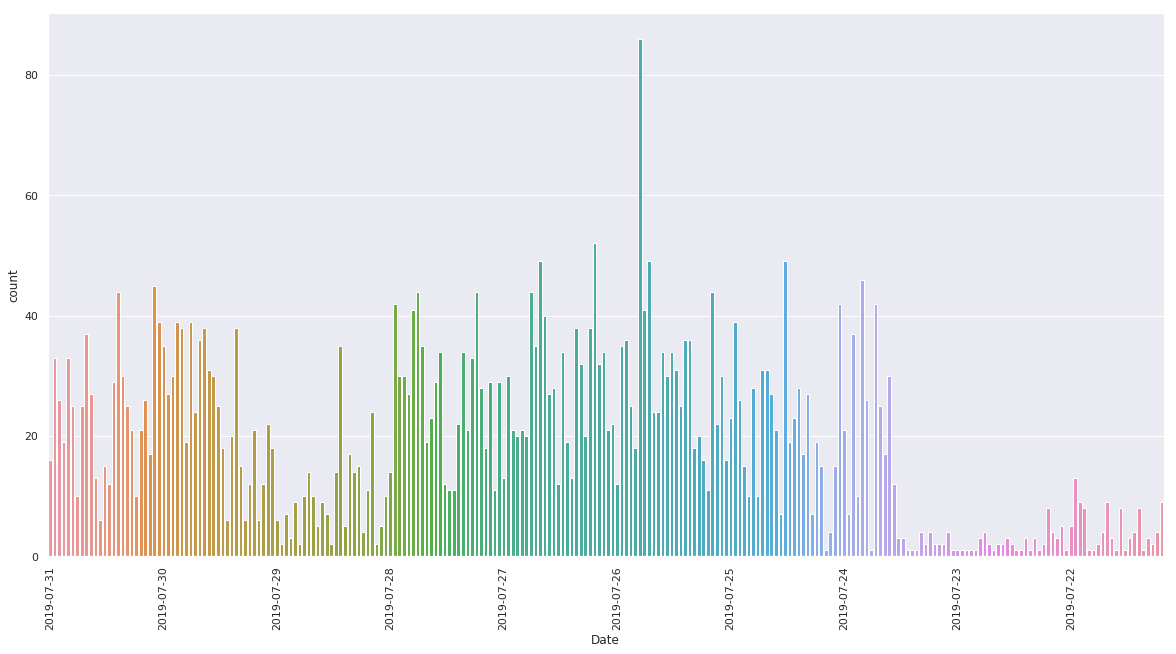

github.com


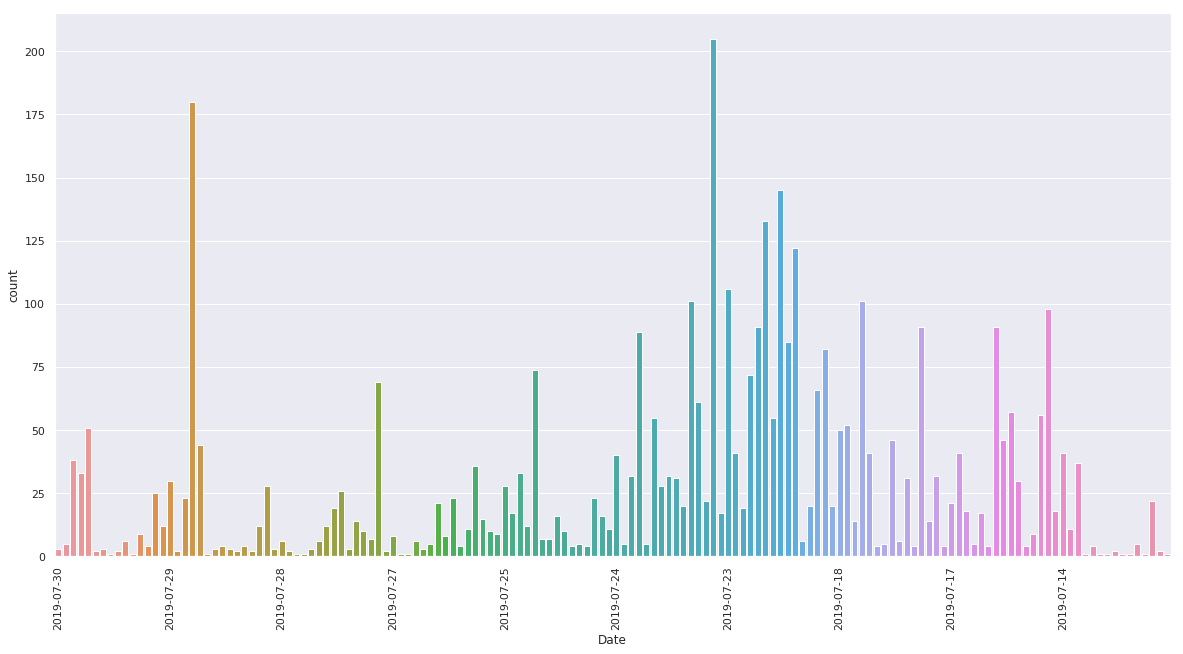

mail.google.com


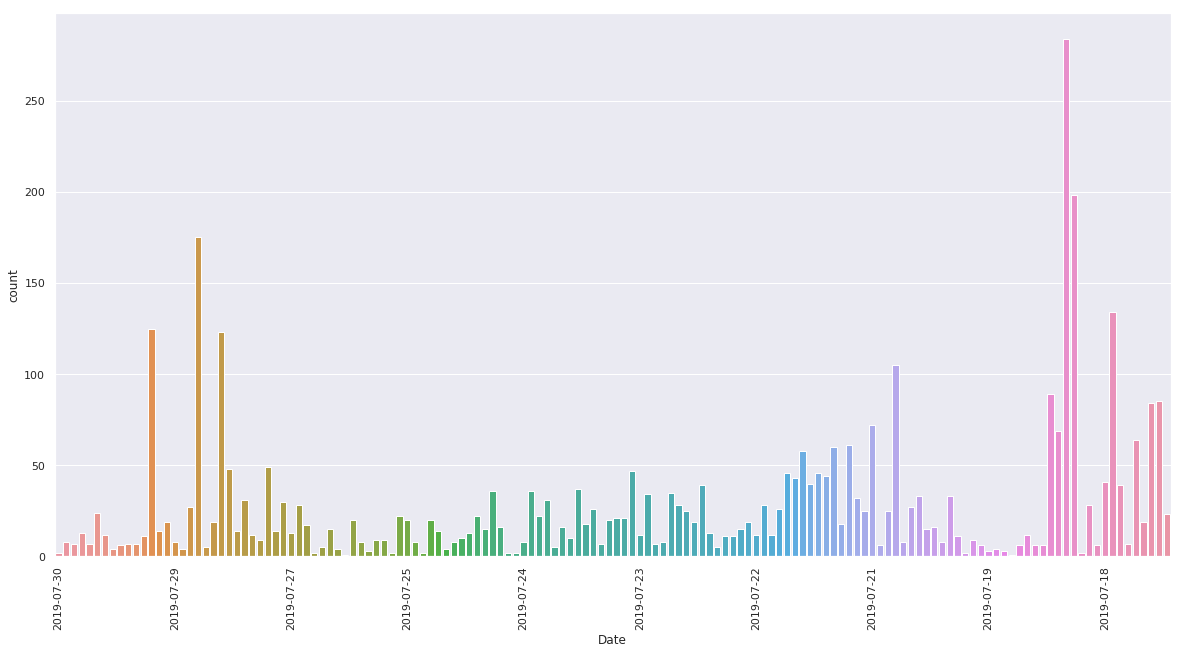

m.facebook.com


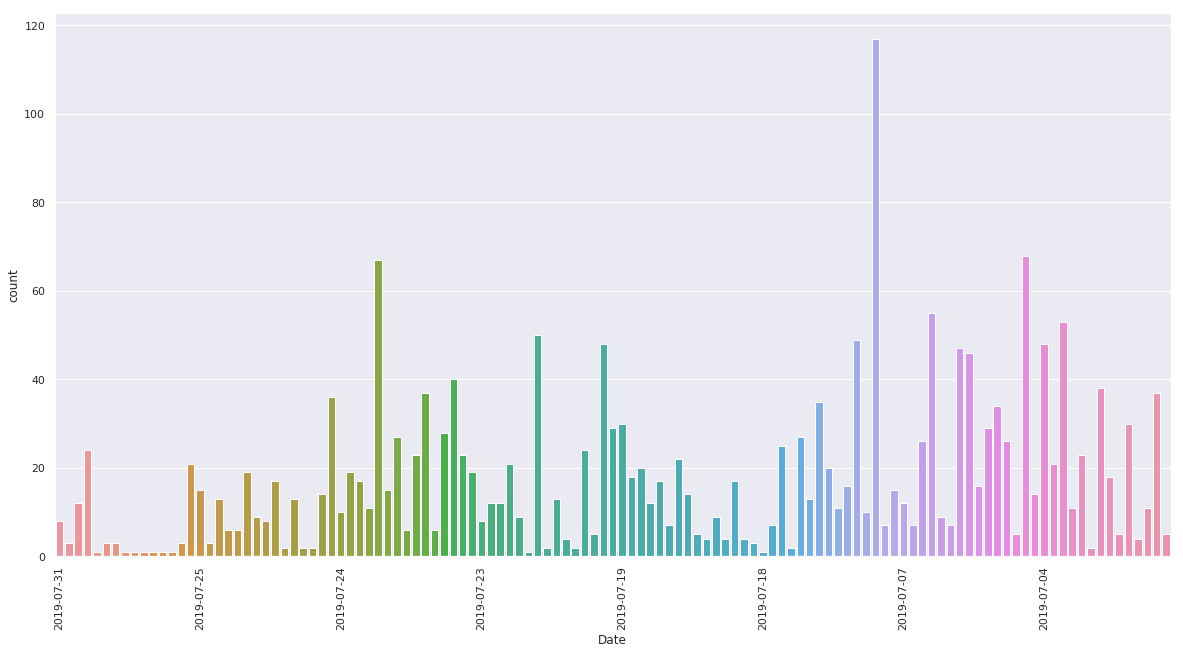

agnigarh.iitg.ac.in:1442


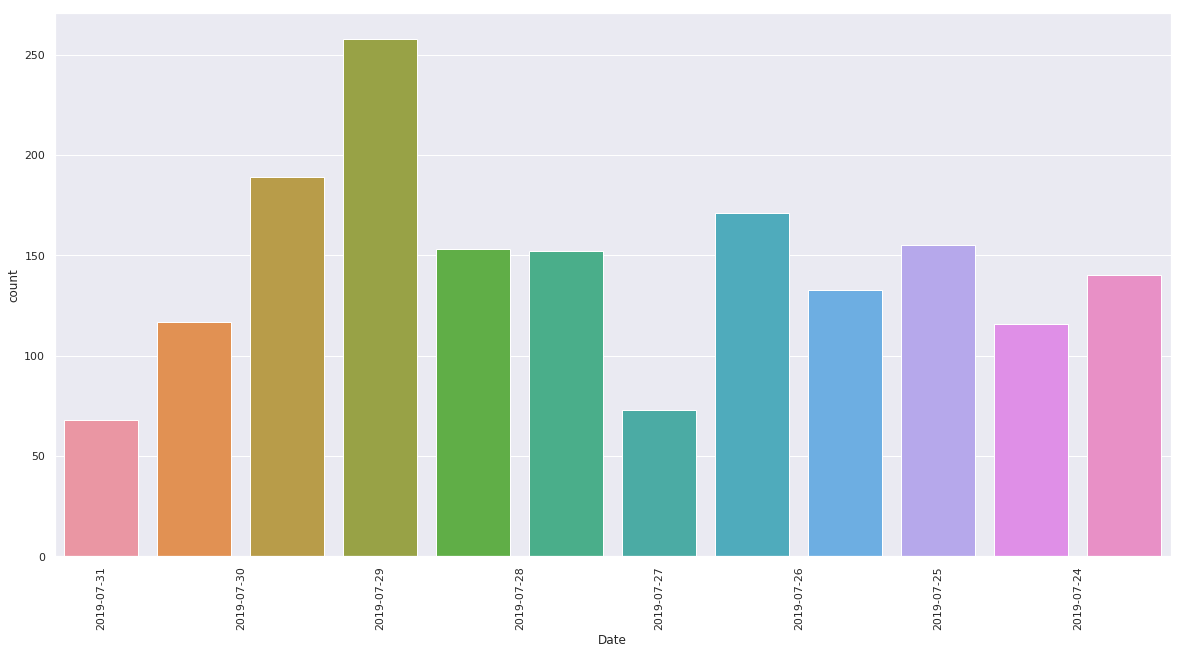

to-do.office.com


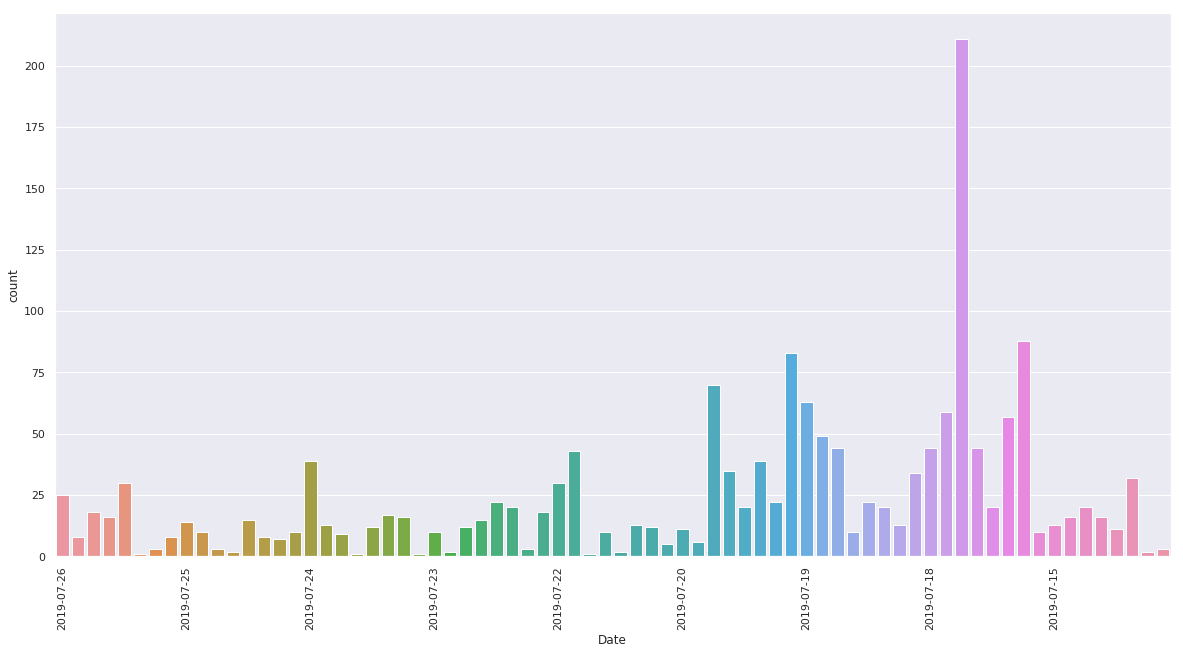

In [38]:
for url in top_10:
    if url=="Not Available" or url=="New Tab":
        continue
    data= df[df["Base_Url"]==url]
    fig1, ax1 = plt.subplots(figsize=(20, 10))

    print(url)
    g=sns.countplot("Date",data=data)
    labels=g.set_xticklabels(rotation=90,labels=g.get_xticklabels())
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))

    plt.show()